In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='arial', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/models")

from ternary_w_interactions import ternary_seg_profile
from scipy import constants

In [3]:
# check the input materials properties
ternary_seg_profile?


Init signature:
ternary_seg_profile(
    D0_C,
    Q_C,
    E_seg_C,
    D0_B,
    Q_B,
    E_seg_B,
    c0_C,
    c0_B,
    L_AB,
    L_AC,
    L_ABC,
    L_BC,
    T,
    d,
    nd,
    dt,
    nt,
)
Docstring:      <no docstring>
Init docstring:
A class to calculate the segregation profiles as a function of time for a ternary system. 
The ternary system is represented as A-B-C, where A is solvent, B is solute #1, and C is solute #2.

...

Attributes
----------
D0_B and D0_C: 1d array
    diffusion coefficients of solute B and C, have the same length as the number of layers $nd$
Q_B and Q_C : 1d array
    diffusion energy barriers of solute B and C, have the same length as the number of layers $nd$
E_seg_B and E_seg_C: 1d array
    segregation energies of solute B and C, have the same length as the number of layers $nd$
c0_C and c0_B: floats 
    initial solute concentrations between [0,1]
L_AB,L_AC,L_ABC, and L_BC: floats
    solute-solute interaction energies


T: float
    tempera

In [28]:
# Grid and time step parameters
data_Ni = pd.read_json('../data/Ni_221_flip_E.json')
# 
b = 2.5e-10 #m
a = np.sqrt(2)*b
d = a/np.sqrt(3)
d = b
nd = 100

# segregation parameters
T = 873 #K

# C: Co

c0_C = 0.05

D0_C = 5e-6 #m^2/s
Q_C = 241 #kJ/mol

E_seg_list_C = np.zeros(nd)
E_seg_list_C[0] = data_Ni['Co'][0]
E_seg_list_C[1] = data_Ni['Co'][1]
E_seg_list_C[2] = data_Ni['Co'][2]
E_seg_list_C[3] = data_Ni['Co'][3]
E_seg_list_C[4] = data_Ni['Co'][4]


Q_list_C = np.random.normal(loc=Q_C,scale=5,size=nd)

# B: Cr
c0_B = 0.05

D0_B = 5e-4 #m^2/s
Q_B = 285 #kJ/mol

E_seg_list_B = np.zeros(nd)
E_seg_list_B[0] = data_Ni['Cr'][0]
E_seg_list_B[1] = data_Ni['Cr'][1]
E_seg_list_B[2] = data_Ni['Cr'][2]
E_seg_list_B[3] = data_Ni['Cr'][3]
E_seg_list_B[4] = data_Ni['Cr'][4]


Q_list_B = np.random.normal(loc=Q_B,scale=5,size=nd)


# time
dt = 1  # time step size /s
nt = 10000  # number of time steps


In [29]:
# solute-solute interaction energies
J2eV = 8.617333262145e-5/1.380649e-23
NA = constants.Avogadro

# data from https://doi.org/10.1016/j.calphad.2015.12.007
# Cr in Ni # FCC
L_AB = (+8030-12.8801*T) * J2eV /NA

# Co in Ni # FCC
L_AC = (-800+1.2629*T) * J2eV /NA

# Co-Cr in Ni # FCC
L_ABC = (-40710+13.5334*T) * J2eV /NA

# Co-Cr
L_BC = (+1500-9.592*T) * J2eV/NA


In [30]:
system = ternary_seg_profile(D0_C,Q_C, # 1d array, same length as nd
           E_seg_list_C,# 1d array, same length as nd
           D0_B,Q_B, # 1d array, same length as nd
           E_seg_list_B,# 1d array, same length as nd
           c0_C,c0_B,
           L_AB,L_AC,L_ABC,L_BC,
           T,
           d,
           nd, 
           dt,
           nt)


In [31]:
system.tabulate_calc_res()

/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:261: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_B_layer_{i}'] = self.X_layers_B_vs_t.T[i]
/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:264: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_C_layer_{i}'] = self.X_layers_C_vs_t.T[i]


In [32]:
# take a look at the data
system.calc_data

,time(s),x_B_layer_0,x_B_layer_1,x_B_layer_2,x_B_layer_3,x_B_layer_4,x_B_layer_5,x_B_layer_6,x_B_layer_7,x_B_layer_8,...,x_C_layer_90,x_C_layer_91,x_C_layer_92,x_C_layer_93,x_C_layer_94,x_C_layer_95,x_C_layer_96,x_C_layer_97,x_C_layer_98,x_C_layer_99
0,0.0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
1,1.0,0.049889,0.051327,0.048995,0.049840,0.049949,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
2,2.0,0.049918,0.052387,0.048165,0.049636,0.049898,0.049996,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
3,3.0,0.050037,0.053257,0.047472,0.049401,0.049844,0.049989,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
4,4.0,0.050221,0.053980,0.046890,0.049144,0.049787,0.049979,0.049999,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996.0,0.081202,0.081180,0.052506,0.049176,0.048459,0.048467,0.048475,0.048484,0.048494,...,0.049934,0.049941,0.049949,0.049956,0.049963,0.049971,0.049978,0.049985,0.049993,0.05
9997,9997.0,0.081202,0.081180,0.052506,0.049176,0.048459,0.048467,0.048475,0.048484,0.048495,...,0.049934,0.049941,0.049949,0.049956,0.049963,0.049971,0.049978,0.049985,0.049993,0.05
9998,9998.0,0.081202,0.081180,0.052507,0.049177,0.048460,0.048467,0.048475,0.048484,0.048495,...,0.049934,0.049941,0.049949,0.049956,0.049963,0.049971,0.049978,0.049985,0.049993,0.05
9999,9999.0,0.081202,0.081180,0.052507,0.049177,0.048460,0.048467,0.048475,0.048484,0.048495,...,0.049934,0.049941,0.049949,0.049956,0.049963,0.049971,0.049978,0.049985,0.049993,0.05


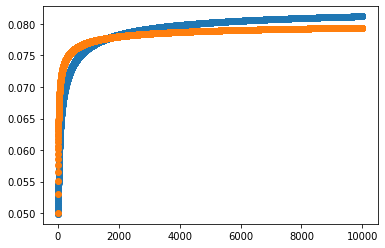

In [59]:
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_B_layer_0'])
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_C_layer_0'])


(0.0, 5000.0)

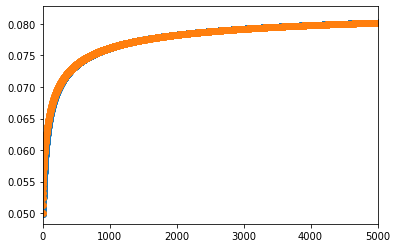

In [34]:
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_B_layer_0'])
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_B_layer_1'])
plt.xlim(0,5000)


(0.0, 5e-05)

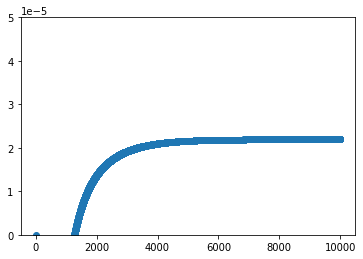

In [73]:
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_B_layer_0']-system.calc_data['x_B_layer_1'])
plt.ylim(0,5e-5)


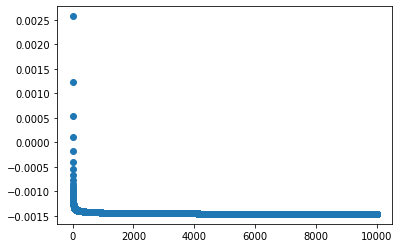

In [74]:
plt.scatter(system.calc_data['time(s)'],system.Delta_G_ij_B_vs_t.T[0])


(0.0, 5000.0)

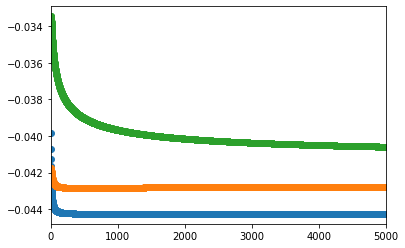

In [41]:
plt.scatter(system.calc_data['time(s)'],system.Delta_G_ij_B_vs_t.T[0]+system.Delta_G_ij_B_vs_t.T[1]+
            system.Delta_G_ij_B_vs_t.T[2]+system.Delta_G_ij_B_vs_t.T[3]+
            system.Delta_G_ij_B_vs_t.T[4]+system.Delta_G_ij_B_vs_t.T[5]+
            system.Delta_G_ij_B_vs_t.T[6])

plt.scatter(system.calc_data['time(s)'],system.Delta_G_ij_B_vs_t.T[1]+
            system.Delta_G_ij_B_vs_t.T[2]+system.Delta_G_ij_B_vs_t.T[3]+
            system.Delta_G_ij_B_vs_t.T[4]+system.Delta_G_ij_B_vs_t.T[5]+
            system.Delta_G_ij_B_vs_t.T[6])

plt.scatter(system.calc_data['time(s)'],system.Delta_G_ij_C_vs_t.T[0]+system.Delta_G_ij_C_vs_t.T[1]+
            system.Delta_G_ij_C_vs_t.T[2]+system.Delta_G_ij_C_vs_t.T[3]+
            system.Delta_G_ij_C_vs_t.T[4]+system.Delta_G_ij_C_vs_t.T[5]+
            system.Delta_G_ij_C_vs_t.T[6])

plt.xlim(0,5000)


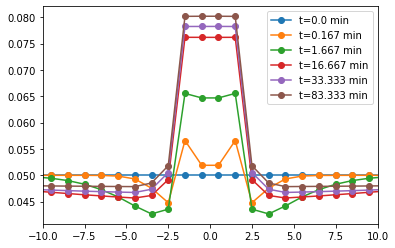

In [43]:
for i in [0,10,100,1000,2000,5000]:
    X_of_layers = np.hstack([system.X_layers_B_vs_t[i][::-1],system.X_layers_B_vs_t[i]])
    layers = np.arange(nd)+0.5
    n_layers = np.hstack([-layers[::-1],layers])
    plt.plot(n_layers,X_of_layers,'-o',
             label=f't={np.round(system.t[i]/60,3)} min')

plt.xlim(-10,10)
plt.legend()


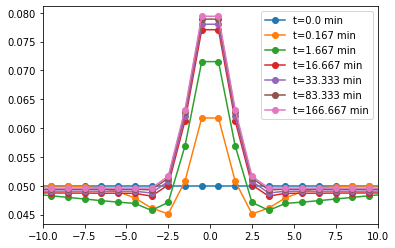

In [44]:
for i in [0,10,100,1000,2000,5000,10000]:
    X_of_layers = np.hstack([system.X_layers_C_vs_t[i][::-1],system.X_layers_C_vs_t[i]])
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    plt.plot(n_layers,X_of_layers,'-o',
             label=f't={np.round(system.t[i]/60,3)} min')
    
plt.xlim(-10,10)
plt.legend()


<Figure size 432x288 with 0 Axes>

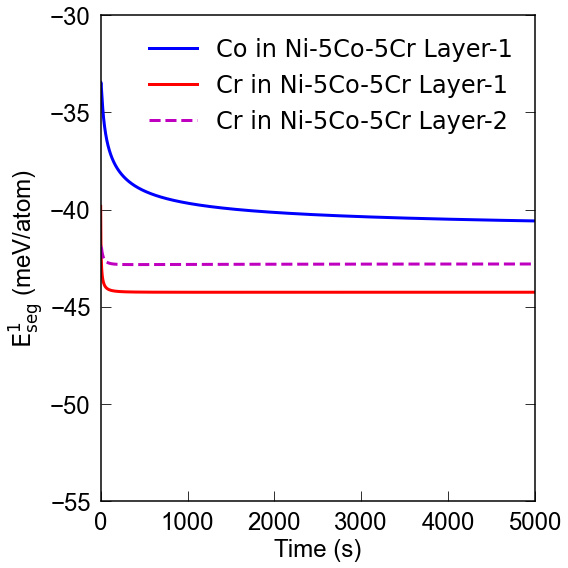

In [78]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(0.0,5000)
ax1.set_ylim(-55,-30)
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','k']
                  
markers = ['o','<','s','d','x','>','v']


Seg_Energy_B_L_1 = system.Delta_G_ij_B_vs_t.T[0] + system.Delta_G_ij_B_vs_t.T[1]+system.Delta_G_ij_B_vs_t.T[2]+system.Delta_G_ij_B_vs_t.T[3]+system.Delta_G_ij_B_vs_t.T[4]

Seg_Energy_B_L_2 = system.Delta_G_ij_B_vs_t.T[1]+system.Delta_G_ij_B_vs_t.T[2]+system.Delta_G_ij_B_vs_t.T[3]+system.Delta_G_ij_B_vs_t.T[4]
            
Seg_Energy_C_L_1 = system.Delta_G_ij_C_vs_t.T[0] + system.Delta_G_ij_C_vs_t.T[1]+system.Delta_G_ij_C_vs_t.T[2]+system.Delta_G_ij_C_vs_t.T[3]+system.Delta_G_ij_C_vs_t.T[4]


t = system.calc_data['time(s)']

ax1.plot(t,Seg_Energy_C_L_1*1000,
         color='b',mec='b',mfc='None',ls='-',lw=3,label='Co in Ni-5Co-5Cr Layer-1')

ax1.plot(t,Seg_Energy_B_L_1*1000,
         color='r',mec='r',mfc='None',ls='-',lw=3,label='Cr in Ni-5Co-5Cr Layer-1')

ax1.plot(t,Seg_Energy_B_L_2*1000,
         color='m',mec='m',mfc='None',ls='--',lw=3,label='Cr in Ni-5Co-5Cr Layer-2')


#ax1.plot(t,Seg_Energy_B_L_2*1000,
#         color='r',mec='r',mfc='None',ls='--',lw=3,label='Cr in Ni-5Co-5Cr Layer-2')


#overall_comp = np.array([np.mean(x) for x in X_layers_vs_t])*100
#ax1.plot(t,overall_comp,color='k',mec='k',mfc='None',ls='--',lw=3,label='Averaged')


ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_ylabel('$\mathsf{E_{seg}^1}$ (meV/atom)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,loc='upper right')
ax1.set_xlabel('Time (s)',fontproperties=ticks_font)
plt.tight_layout()

#f.savefig('./plots/NiCoCr_ISF_layer_1_Seg_energy_time.pdf')

In [68]:
Seg_Energy_B_L_2 - Seg_Energy_B_L_1

array([-0.00257007, -0.0012374 , -0.0005448 , ...,  0.00146105,
        0.00146105,  0.00146106])

<Figure size 432x288 with 0 Axes>

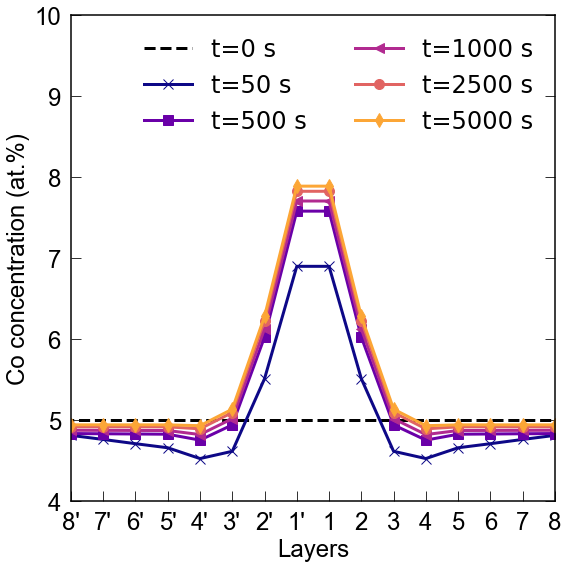

In [70]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(-7.5,7.5)
ax1.set_ylim(4,10)

def generate_gradient_colors(num_colors=10):
    # Create a gradient from one color to another
    colors = plt.cm.plasma(np.linspace(0, 1, num_colors))
    return colors

CB_color_cycle = generate_gradient_colors(num_colors=6)
                  
markers = ['x','s','<','o','d','>','v']

m_i = 0

for i in [0]:
    X_of_layers = np.hstack([system.X_layers_C_vs_t[i][::-1],system.X_layers_C_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,ls='--',lw=3,color='k',
             label=f't={int(np.ceil(t[i]))} s')
    #m_i +=1 
    
    
for i in [50,500,1000,2500,5000]:
    X_of_layers = np.hstack([system.X_layers_C_vs_t[i][::-1],system.X_layers_C_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,marker=markers[m_i],color=CB_color_cycle[m_i],lw=3,markersize=10,
             label=f't={int(np.round(t[i]))} s')
    m_i +=1 
ax1.set_xticks([x+0.5 for x in np.arange(-8,8)])
labellist = [x for x in range(1,9)]

ax1.set_xticklabels([str(x)+'\'' for x in labellist[::-1]]+labellist,fontsize=24)

ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('Layers',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,ncol=2)
ax1.set_ylabel('Co concentration (at.%)',fontproperties=ticks_font)
plt.tight_layout()
#f.savefig('./plots/NiCoCr_ISF_Co_seg_vs_layers.pdf')

<Figure size 432x288 with 0 Axes>

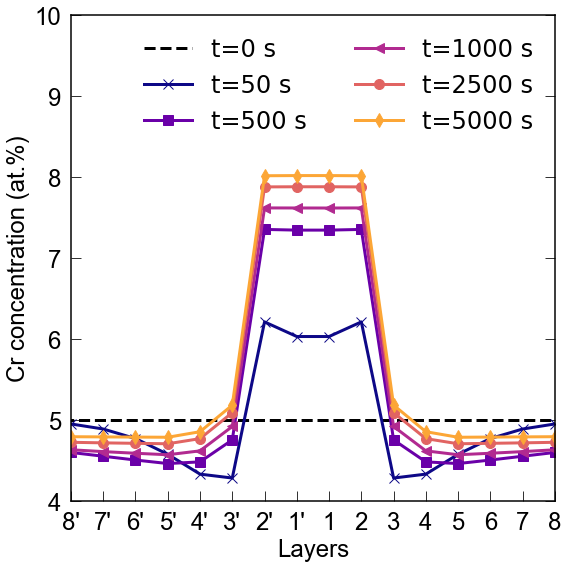

In [84]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(-7.5,7.5)
ax1.set_ylim(4,10)

def generate_gradient_colors(num_colors=10):
    # Create a gradient from one color to another
    colors = plt.cm.plasma(np.linspace(0, 1, num_colors))
    return colors

CB_color_cycle = generate_gradient_colors(num_colors=6)
                  
markers = ['x','s','<','o','d','>','v']

m_i = 0

for i in [0]:
    X_of_layers = np.hstack([system.X_layers_B_vs_t[i][::-1],system.X_layers_B_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,ls='--',lw=3,color='k',
             label=f't={int(np.ceil(t[i]))} s')
    #m_i +=1 
    
    
for i in [50,500,1000,2500,5000]:
    X_of_layers = np.hstack([system.X_layers_B_vs_t[i][::-1],system.X_layers_B_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,marker=markers[m_i],color=CB_color_cycle[m_i],lw=3,markersize=10,
             label=f't={int(np.round(t[i]))} s')
    m_i +=1 
ax1.set_xticks([x+0.5 for x in np.arange(-8,8)])
labellist = [x for x in range(1,9)]

ax1.set_xticklabels([str(x)+'\'' for x in labellist[::-1]]+labellist,fontsize=24)

ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('Layers',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,ncol=2)
ax1.set_ylabel('Cr concentration (at.%)',fontproperties=ticks_font)
plt.tight_layout()
#f.savefig('./plots/NiCoCr_ISF_Cr_seg_vs_layers.pdf')

<Figure size 432x288 with 0 Axes>

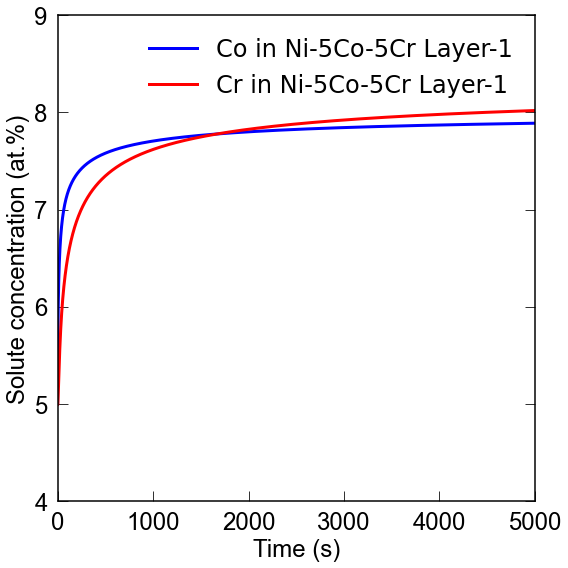

In [64]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(0.0,5000)
ax1.set_ylim(4,9)
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','k']
                  
markers = ['o','<','s','d','x','>','v']

ax1.plot(t,system.X_layers_C_vs_t.T[0]*100,
         color='b',mec='b',mfc='None',ls='-',lw=3,label='Co in Ni-5Co-5Cr Layer-1')


ax1.plot(t,system.X_layers_B_vs_t.T[0]*100,
         color='r',mec='r',mfc='None',ls='-',lw=3,label='Cr in Ni-5Co-5Cr Layer-1')







ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_ylabel('Solute concentration (at.%)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,loc='upper right')
ax1.set_xlabel('Time (s)',fontproperties=ticks_font)
plt.tight_layout()

#f.savefig('./plots/NiCoCr_ISF_layer_time.pdf')

In [80]:

b = 2.5e-10 #m
a = np.sqrt(2)*b
d = a/np.sqrt(3)
d = b
nd = 100

# segregation parameters
T = 873 #K

# C: Co

c0_C = 0.05

D0_C = 5e-6 #m^2/s
Q_C = 241 #kJ/mol

E_seg_list_C = np.zeros(nd)
E_seg_list_C[0] = data_Ni['Co'][0]
E_seg_list_C[1] = data_Ni['Co'][1]
E_seg_list_C[2] = data_Ni['Co'][2]
E_seg_list_C[3] = data_Ni['Co'][3]
E_seg_list_C[4] = data_Ni['Co'][4]


Q_list_C = np.random.normal(loc=Q_C,scale=5,size=nd)

# B: Cr
c0_B = 0.0

D0_B = 0#5e-4C#m^2/s
Q_B = 285 #kJ/mol

E_seg_list_B = np.zeros(nd)

Q_list_B = np.random.normal(loc=Q_B,scale=5,size=nd)


# time
dt = 1  # time step size /s
nt = 5000  # number of time steps


# solute-solute interaction energies
J2eV = 8.617333262145e-5/1.380649e-23
NA = constants.Avogadro

# data from https://doi.org/10.1016/j.calphad.2015.12.007
# Cr in Ni # FCC
#L_AB = (+8030-12.8801*T) * J2eV /NA

# Co in Ni # FCC
L_AC = (-800+1.2629*T) * J2eV /NA

# Co-Cr in Ni # FCC
L_ABC = 0#(-40710+13.5334*T) * J2eV /NA

# Co-Cr
L_BC = 0#(+1500-9.592*T) * J2eV/NA

system_AC = ternary_seg_profile(D0_C,Q_C, # 1d array, same length as nd
           E_seg_list_C,# 1d array, same length as nd
           D0_B,Q_B, # 1d array, same length as nd
           E_seg_list_B,# 1d array, same length as nd
           c0_C,c0_B,
           L_AB,L_AC,L_ABC,L_BC,
           T,
           d,
           nd, 
           dt,
           nt)

In [81]:
system_AC.tabulate_calc_res()

/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:261: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_B_layer_{i}'] = self.X_layers_B_vs_t.T[i]
/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:264: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_C_layer_{i}'] = self.X_layers_C_vs_t.T[i]


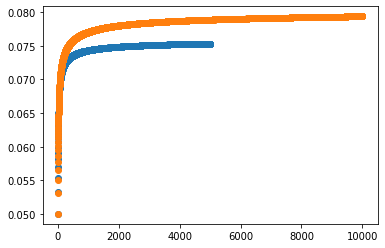

In [82]:
plt.scatter(system_AC.calc_data['time(s)'],system_AC.calc_data['x_C_layer_0'])
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_C_layer_0'])


In [83]:

b = 2.5e-10 #m
a = np.sqrt(2)*b
d = a/np.sqrt(3)
d = b
nd = 100
a
# segregation parameters
T = 873 #K

# C: Co

c0_C = 0.05

D0_C = 5e-6 #m^2/s
Q_C = 241 #kJ/mol

E_seg_list_C = np.zeros(nd)
E_seg_list_C[0] = data_Ni['Co'][0]
E_seg_list_C[1] = data_Ni['Co'][1]
E_seg_list_C[2] = data_Ni['Co'][2]
E_seg_list_C[3] = data_Ni['Co'][3]
E_seg_list_C[4] = data_Ni['Co'][4]


Q_list_C = np.random.normal(loc=Q_C,scale=5,size=nd)

# B: Cr
c0_B = 0.0

D0_B = 0#5e-4 #m^2/s
Q_B = 285 #kJ/mol

E_seg_list_B = np.zeros(nd)

Q_list_B = np.random.normal(loc=Q_B,scale=5,size=nd)


# time
dt = 1  # time step size /s
nt = 5000  # number of time steps


# solute-solute interaction energies
J2eV = 8.617333262145e-5/1.380649e-23
NA = constants.Avogadro

# data from https://doi.org/10.1016/j.calphad.2015.12.007
# Cr in Ni # FCC
#L_AB = (+8030-12.8801*T) * J2eV /NA

# Co in Ni # FCC
L_AC = 0#(-800+1.2629*T) * J2eV /NA

# Co-Cr in Ni # FCC
L_ABC = 0#(-40710+13.5334*T) * J2eV /NA

# Co-Cr
L_BC = 0#(+1500-9.592*T) * J2eV/NA

# just the interaction energy 
system_AC_0 = ternary_seg_profile(D0_C,Q_C, # 1d array, same length as nd
           E_seg_list_C,# 1d array, same length as nd
           D0_B,Q_B, # 1d array, same length as nd
           E_seg_list_B,# 1d array, same length as nd
           c0_C,c0_B,
           L_AB,L_AC,L_ABC,L_BC,
           T,
           d,
           nd, 
           dt,
           nt)

In [84]:
system_AC_0.tabulate_calc_res()

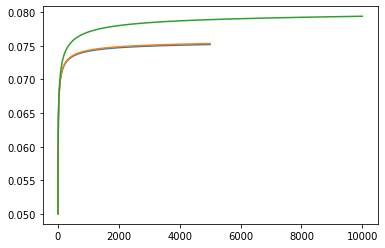

In [85]:
plt.plot(system_AC_0.calc_data['time(s)'],system_AC_0.calc_data['x_C_layer_0'])
plt.plot(system_AC.calc_data['time(s)'],system_AC.calc_data['x_C_layer_0'])
plt.plot(system.calc_data['time(s)'],system.calc_data['x_C_layer_0'])


<Figure size 432x288 with 0 Axes>

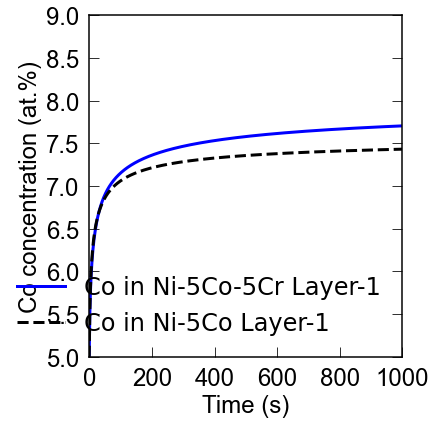

In [86]:
plt.draw()
f = plt.figure(figsize=(6.,6.))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(0.0,1000)
ax1.set_ylim(5,9)
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','k']
                  
markers = ['o','<','s','d','x','>','v']
t = system.calc_data['time(s)']
ax1.plot(t,system.X_layers_C_vs_t.T[0]*100,
         color='b',mec='b',mfc='None',ls='-',lw=3,label='Co in Ni-5Co-5Cr Layer-1')

t = system_AC_0.calc_data['time(s)']
ax1.plot(t,system_AC.X_layers_C_vs_t.T[0]*100,
         color='k',mec='k',mfc='None',ls='--',lw=3,label='Co in Ni-5Co Layer-1')


#overall_comp = np.array([np.mean(x) for x in X_layers_vs_t])*100
#ax1.plot(t,overall_comp,color='k',mec='k',mfc='None',ls='--',lw=3,label='Averaged')





ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_ylabel('Co concentration (at.%)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,loc='lower right')
ax1.set_xlabel('Time (s)',fontproperties=ticks_font)
plt.tight_layout()

#f.savefig('./plots/NiCoCr_ISF_Co_layer_time_compare_no_Cr.pdf')

<Figure size 432x288 with 0 Axes>

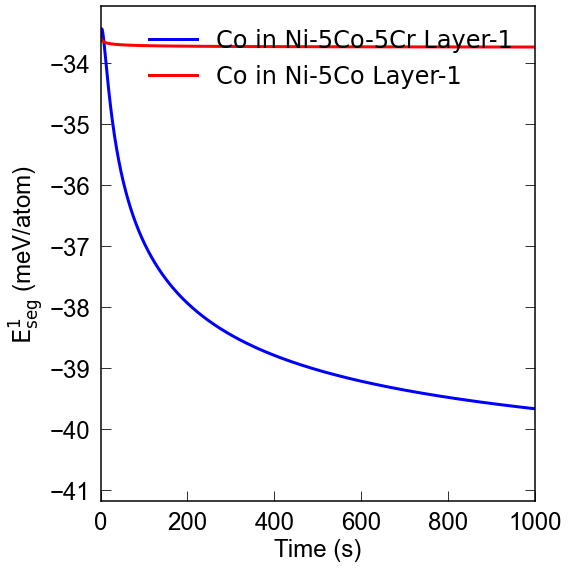

In [94]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(0.0,1000)
#ax1.set_ylim(-55,-30)
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','k']
                  
markers = ['o','<','s','d','x','>','v']

         
Seg_Energy_C_L_1 = system.Delta_G_ij_C_vs_t.T[0] + system.Delta_G_ij_C_vs_t.T[1]+system.Delta_G_ij_C_vs_t.T[2]+system.Delta_G_ij_C_vs_t.T[3]+system.Delta_G_ij_C_vs_t.T[4]

Seg_Energy_C_L_1_0 = system_AC.Delta_G_ij_C_vs_t.T[0] + system_AC.Delta_G_ij_C_vs_t.T[1]+system_AC.Delta_G_ij_C_vs_t.T[2]+system_AC.Delta_G_ij_C_vs_t.T[3]+system_AC.Delta_G_ij_C_vs_t.T[4]


t = system.calc_data['time(s)']

ax1.plot(t,Seg_Energy_C_L_1*1000,
         color='b',mec='b',mfc='None',ls='-',lw=3,label='Co in Ni-5Co-5Cr Layer-1')

t = system_AC.calc_data['time(s)']
ax1.plot(t,Seg_Energy_C_L_1_0*1000,
         color='r',mec='r',mfc='None',ls='-',lw=3,label='Co in Ni-5Co Layer-1')


#ax1.plot(t,Seg_Energy_B_L_2*1000,
#         color='r',mec='r',mfc='None',ls='--',lw=3,label='Cr in Ni-5Co-5Cr Layer-2')


#overall_comp = np.array([np.mean(x) for x in X_layers_vs_t])*100
#ax1.plot(t,overall_comp,color='k',mec='k',mfc='None',ls='--',lw=3,label='Averaged')


ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_ylabel('$\mathsf{E_{seg}^1}$ (meV/atom)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,loc='upper right')
ax1.set_xlabel('Time (s)',fontproperties=ticks_font)
plt.tight_layout()

